# CBE 562 Homework 1

#### Tyson Wheelwright

## Problem 1

![Alt text](image-5.png)

I’m not sure about a lot. I think the little t is one chemical, and the big T is another chemical and energy is being transferred in the middle. I’m guessing the chemical properties (like how much heat they can absorb before boiling) affect the heat transfer. I’m guessing that the contact area between the two tanks (?) directly relates to how much heat can be transferred. I’m guessing that the size of the tanks, and the materials they are made out of affect the heat transfer rate. If t-in decreases t out decreases. If T-in decrees, T-out decreases. 

![Alt text](image-6.png)

H = total heat transferred  
F = flow rate = input - output   
D = heat difference = |T’s temp - t’s temp|    
E = exchange parameter = D * heat transfer material coefficient  
H = F_T * F_t * E  
  
So for sure there’s a better way to put this. Forgive, I don’t have a chemical engineering background.   

![Alt text](image-7.png)

The EXACT flow and the EXACT temp are not known (sensors). We would have to get them from formulas. And the heat transfer coefficient wouldn’t be known either unless we’re relying on someone else’s experiment (fundamental laws).

![Alt text](image-8.png)

It’s a mix of both.. The mechanistic part are the calculated values, like H or E (but the boundary is fuzzy because these rely on measurement so it’s all metrology in the end). But, ignoring that, the empirical values are the heat difference and the flow rate because these rely on our empirical sensors. 

![Alt text](image-9.png)

No. I think there will always be sensor and flow variability (and sensors that measure flow). Temperature will also probably be variable. So the best I can hope for is something reasonably accurate. (Does pressure matter here too? ohno). 
But to the point of the question: my model won’t be perfect because my sensors aren’t perfect and even though I’m not in chemE, I know fluids are pretty sneaky for sure.

## Problem 2

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

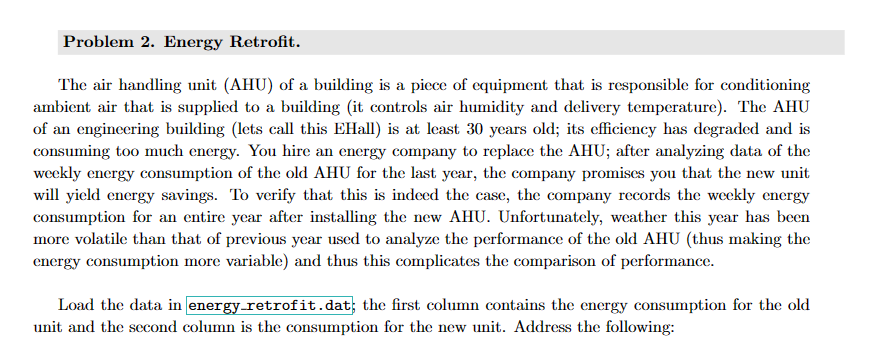

![Alt text](image.png)

In [207]:
df = pd.read_csv('../Matlab/Data/energy_retrofit.dat', delimiter='\s+', header=None, names=['old_ahu', 'new_ahu'])

#The mode is all of the values!
# df['old_ahu'].mode()
# df['new_ahu'].mode()
df.describe()

,old_ahu,new_ahu
count,52.000000,52.000000
mean,20.257990,18.515980
std,1.247977,2.495954
min,17.055716,12.111432
25%,19.486074,16.972148
50%,20.318986,18.637971
75%,20.924970,19.849940
max,23.578397,25.156794


In [208]:
#but I'll calculate it by just trunkating the values
int_df = df.astype(int)
print(f"old AHU mode: {int_df['old_ahu'].mode()}\n new AHU mode: {int_df['new_ahu'].mode()}")

old AHU mode: 0    20
Name: old_ahu, dtype: int32
 new AHU mode: 0    17
1    19
Name: new_ahu, dtype: int32


![Alt text](image-1.png)

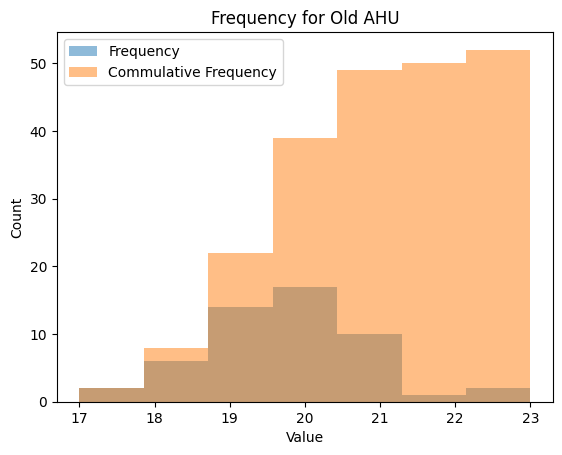

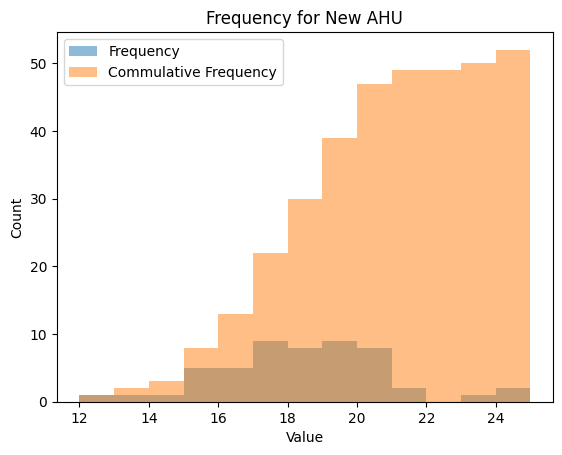

In [209]:
#bin them by whole numbers - did this before
old_ahu = int_df['old_ahu'].to_numpy()
new_ahu = int_df['new_ahu'].to_numpy()


unique_values_old_ahu, counts_old_ahu = np.unique(old_ahu, return_counts=True)
unique_values_new_ahu, counts_new_ahu = np.unique(new_ahu, return_counts=True)

#Plot a histogram of the frequencey for the old and new ahu
plt.hist(unique_values_old_ahu, bins=len(unique_values_old_ahu), weights=counts_old_ahu, label='Frequency', alpha=0.5)
plt.hist(unique_values_old_ahu, bins=len(unique_values_old_ahu), weights=counts_old_ahu, cumulative=True, label='Commulative Frequency', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Frequency for Old AHU')
plt.legend()
plt.show()


plt.hist(unique_values_new_ahu, bins=len(unique_values_new_ahu), weights=counts_new_ahu, label='Frequency', alpha=0.5)
plt.hist(unique_values_new_ahu, bins=len(unique_values_new_ahu), weights=counts_new_ahu, cumulative=True, label='Commulative Frequency', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Frequency for New AHU')
plt.legend()
plt.show()

![Alt text](image-2.png)

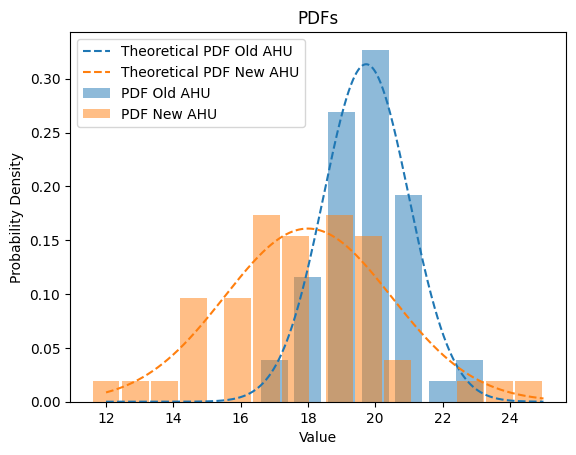

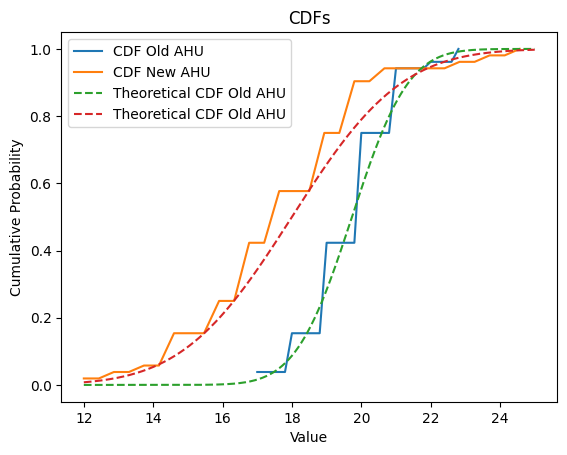

In [210]:
#calculating the actuals
old_ahu_np_hist, old_ahu_bins = np.histogram(old_ahu, bins=30, density=True)
old_ahu_pdf = old_ahu_np_hist / np.sum(old_ahu_np_hist)
old_ahu_cdf = np.cumsum(old_ahu_np_hist) * np.diff(old_ahu_bins)

new_ahu_hist, bins_new_ahu = np.histogram(new_ahu, bins=30, density=True)
new_ahu_pdf = new_ahu_hist / np.sum(new_ahu_hist)
new_ahu_cdf = np.cumsum(new_ahu_hist) * np.diff(bins_new_ahu)

#calculating the theoreticals
x = np.linspace(np.min(new_ahu), np.max(new_ahu), 1000)
mean_old_ahu, std_old_ahu = stats.norm.fit(old_ahu)
mean_new_ahu, std_new_ahu = stats.norm.fit(new_ahu)

pdf_perfect_old_ahu = stats.norm.pdf(x, loc=mean_old_ahu, scale=std_old_ahu)
pdf_perfect_new_ahu = stats.norm.pdf(x, loc=mean_new_ahu, scale=std_new_ahu)
cdf_perfect_old_ahu = stats.norm.cdf(x, loc=mean_old_ahu, scale=std_old_ahu)
cdf_perfect_new_ahu = stats.norm.cdf(x, loc=mean_new_ahu, scale=std_new_ahu)

#plots
plt.bar(old_ahu_bins[:-1], old_ahu_pdf, label='PDF Old AHU', alpha=0.5) #-1 to just get it to work. haha. 
plt.bar(bins_new_ahu[:-1], new_ahu_pdf, label='PDF New AHU', alpha=0.5)
plt.plot(x, pdf_perfect_old_ahu, '--', label='Theoretical PDF Old AHU')
plt.plot(x, pdf_perfect_new_ahu, '--', label='Theoretical PDF New AHU')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('PDFs')
plt.legend()
plt.show()


plt.plot(old_ahu_bins[:-1], old_ahu_cdf, label='CDF Old AHU')
plt.plot(bins_new_ahu[:-1], new_ahu_cdf, label='CDF New AHU')
plt.plot(x, cdf_perfect_old_ahu, '--', label='Theoretical CDF Old AHU')
plt.plot(x, cdf_perfect_new_ahu, '--', label='Theoretical CDF Old AHU')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.title('CDFs')
plt.legend()
plt.show()

![Alt text](image-3.png)

In [211]:
#we want the floats instead of the ints now (should have probabaly rounded)
old_ahu = df['old_ahu'].to_numpy()
new_ahu = df['new_ahu'].to_numpy()
mean_old_ahu, std_old_ahu = stats.norm.fit(old_ahu)
mean_new_ahu, std_new_ahu = stats.norm.fit(new_ahu)

print(f'{mean_old_ahu = }\n{mean_new_ahu = }')
print('Old AHU is not acceptable, but the new AHU is.')

mean_old_ahu = 20.25799007692308
mean_new_ahu = 18.51598007692308
Old AHU is not acceptable, but the new AHU is.


## Problem 3

![Alt text](hw1-cbe562-fall2023-3.jpg)

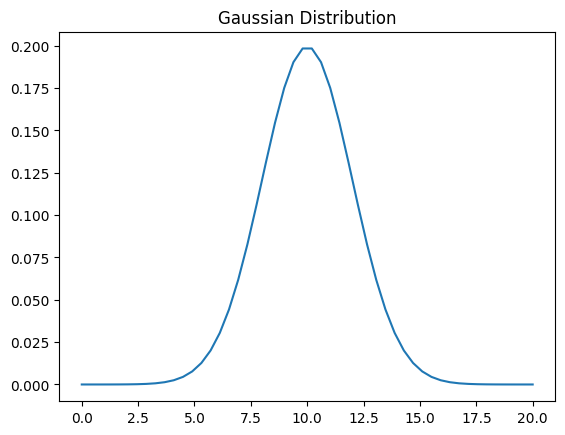

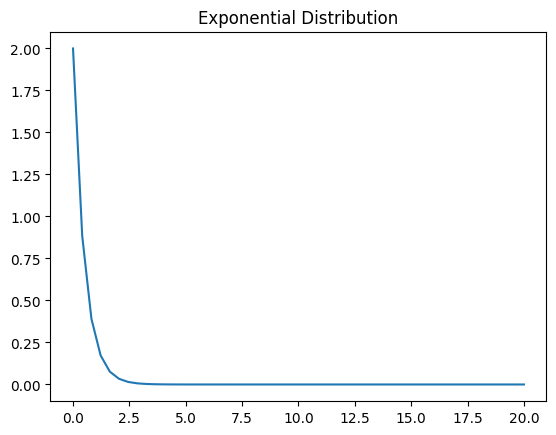

In [212]:
#Gaussian and Exponential Plotting
import math

#Defining vars
plot_size = 20
x = np.linspace(0, plot_size)
sigma = 2
mu = 10
beta = 0.5

# gaussian = (1 / (math.sqrt(2 * math.pi) * sigma)) * math.e ** ((-1 * (x - mu)) / (2 * sigma ** 2))
gaussian = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

exponential = (1/(beta) * np.exp(-x/beta))

    

plt.plot(x, gaussian, label='Gaussian')
plt.title('Gaussian Distribution')
plt.show()
plt.plot(x, exponential, label='Exponential')
plt.title('Exponential Distribution')
plt.show()

It looks like I was right! Yay.

## Problem 4

![Alt text](image-10.png)

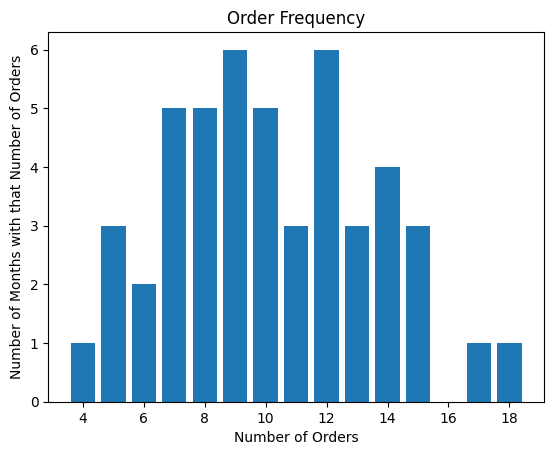

Probability of 10 orders: 0.10416666666666667
Probability of 15 orders: 0.0625
Probability of 20 order: 0


In [213]:
df = pd.read_csv('../Matlab/Data/orders_data.dat', delimiter='\s+', header=None, names=['orders'])
total_data_size = len(df['orders'])


order_counts = df['orders'].value_counts().sort_index()

plt.bar(order_counts.index, order_counts.values)
plt.title('Order Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Months with that Number of Orders')
plt.show()


def find_prob(num):
    try: 
        return df['orders'].value_counts()[num] / total_data_size
    except KeyError:
        return 0
print(f'Probability of 10 orders: {find_prob(10)}\nProbability of 15 orders: {find_prob(15)}\nProbability of 20 order: {find_prob(20)}')

![Alt text](image-11.png)

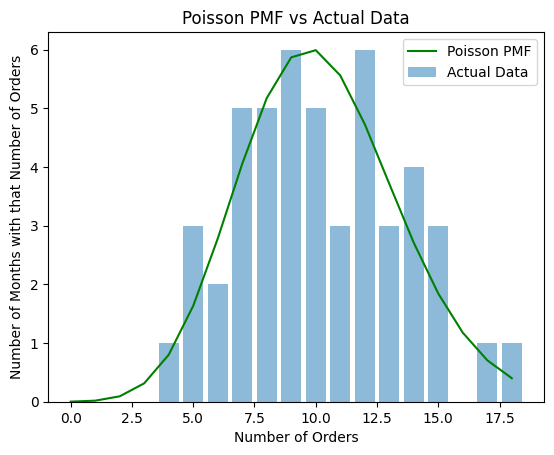

In [214]:
from scipy.stats import poisson, chi2_contingency

x_values = np.arange(0, max(order_counts.index) + 1)
mean = df['orders'].mean()
df_len = len(df)

def poisson_pmf(mean, df_len, x_vals):
    y = []
    for x in x_vals:
        y.append(poisson.pmf(x, mean) * df_len)
    return y

poisson_pmf_values = poisson_pmf(mean, df_len, x_values)

plt.bar(order_counts.index, order_counts.values, alpha=0.5, label='Actual Data')
plt.plot(x_values, poisson_pmf_values, color='g', label='Poisson PMF')
plt.title('Poisson PMF vs Actual Data')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Months with that Number of Orders')
plt.legend()
plt.show()

It looks like it maches the distribution to me. 

![Alt text](image-12.png)

In [215]:
x = [10, 15, 20]
print(f'{poisson_pmf(mean, 3, x) = }')

#vs previous probs.... not looks too good!
# Probability of 10 orders: 0.10416666666666667
# Probability of 15 orders: 0.0625
# Probability of 20 order: 0

poisson_pmf(mean, 3, x) = [0.37452758678036174, 0.11521829580781254, 0.006865476023789287]


![Alt text](image-13.png)

In [220]:
print(f"probablility that they'll need 25: {poisson_pmf(mean, 1, [25])[0]}")
# the value is SUPER SMALL 
# no need to worry. 

probablility that they'll need 25: 3.979262153635248e-05


Thanks for grading! :)